## 导入会用到的Python库
cv2: opencv-python

In [1]:
import os
import cv2
import joblib
import matplotlib.pyplot as plt

## 导入训练好的MLPClassifier

In [2]:
clf = joblib.load('character_recognition.joblib')

## 拍摄一张照片

--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 352x288.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to 'image.jpg'.


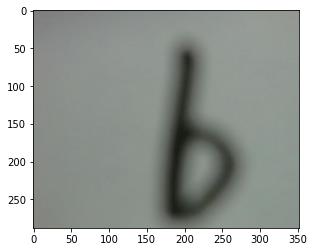

In [25]:

os.system('fswebcam --no-banner image.jpg')
image = cv2.imread('image.jpg')
plt.imshow(image)


## 对照片进行处理

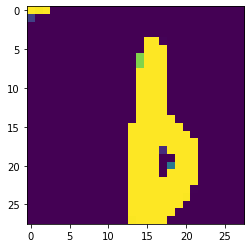

In [27]:
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
shold, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY|cv2.THRESH_TRIANGLE)
image = cv2.bitwise_not(image)
'''
points = cv2.findNonZero(image)
x, y, w, h = cv2.boundingRect(points)
if (w > 0 and h > 0):
    if w > h:
        y = y - (w-h)//2
        image = image[y:y+w, x:x+w]
    else:
        x = x - (h-w)//2
        image = image[y:y+h, x:x+h]
'''
image = cv2.resize(image, (28,28), interpolation = cv2.INTER_CUBIC)
plt.imshow(image)

## 使用导入的模型进行预测

In [5]:
from sklearn.neural_network import MLPClassifier
import numpy as np

single_item_array = (np.array(image)).reshape(1,784)
prediction = clf.predict(single_item_array)

print(str(chr(prediction[0]+96)))

u
